## Importing Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

## Loading the results csv

In [2]:
csv_files = sorted(glob.glob("../results/results_*.csv"))

dfs = []
epoch_offset = 0

for file in csv_files:
    df = pd.read_csv(file)

    # Fix epoch continuity
    df["epoch"] = df["epoch"] + epoch_offset
    epoch_offset = df["epoch"].iloc[-1] + 1

    dfs.append(df)

results = pd.concat(dfs, ignore_index=True)

print(f"✅ Total epochs after concat: {results['epoch'].max() + 1}")

✅ Total epochs after concat: 55


## Plotting the metrics

In [3]:
# -----------------------------
# Helper function for plotting
# -----------------------------
def plot_metric(x, y, title, ylabel):
    plt.figure(figsize=(7,4))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

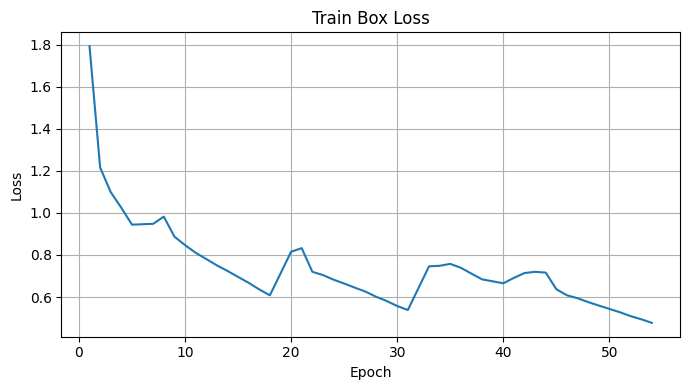

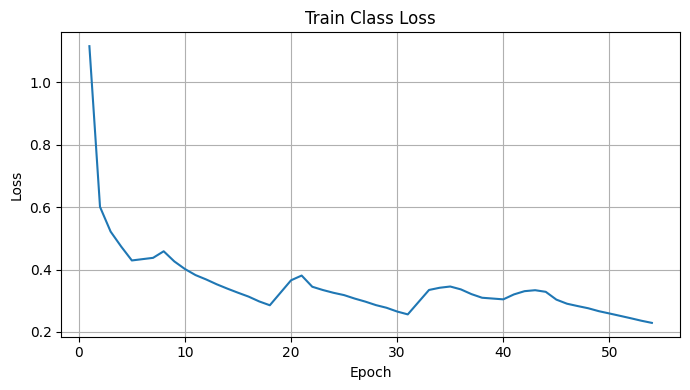

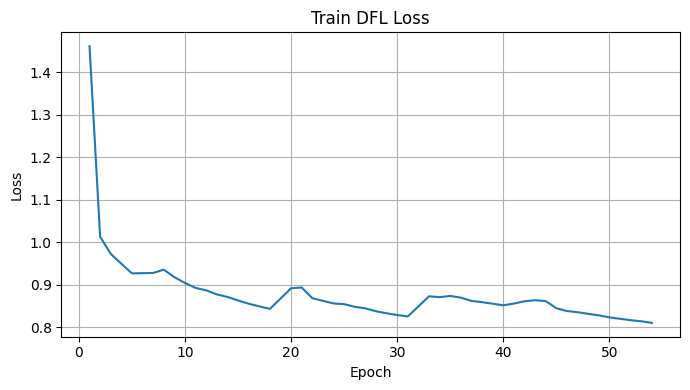

In [4]:
# -----------------------------
# 1️⃣ Train Losses
# -----------------------------
plot_metric(results["epoch"], results["train/box_loss"], "Train Box Loss", "Loss")
plot_metric(results["epoch"], results["train/cls_loss"], "Train Class Loss", "Loss")
plot_metric(results["epoch"], results["train/dfl_loss"], "Train DFL Loss", "Loss")

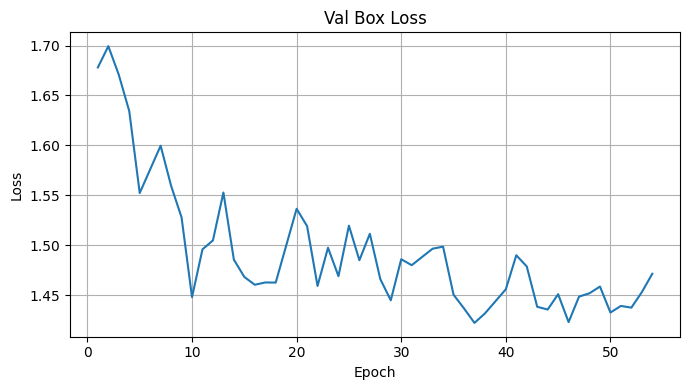

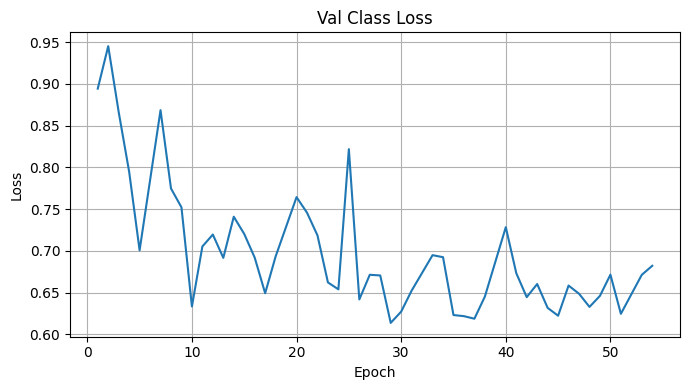

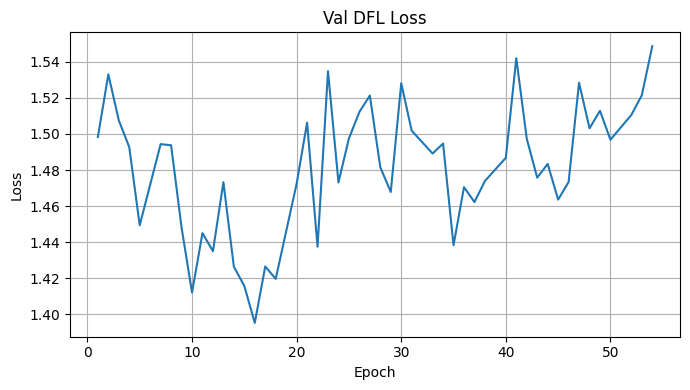

In [5]:
# -----------------------------
# 2️⃣ Validation Losses
# -----------------------------
plot_metric(results["epoch"], results["val/box_loss"], "Val Box Loss", "Loss")
plot_metric(results["epoch"], results["val/cls_loss"], "Val Class Loss", "Loss")
plot_metric(results["epoch"], results["val/dfl_loss"], "Val DFL Loss", "Loss")


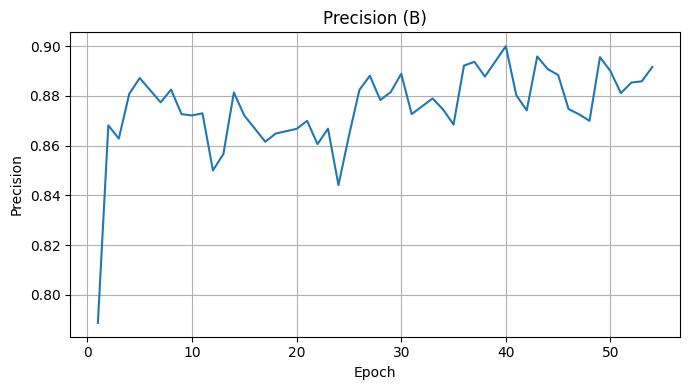

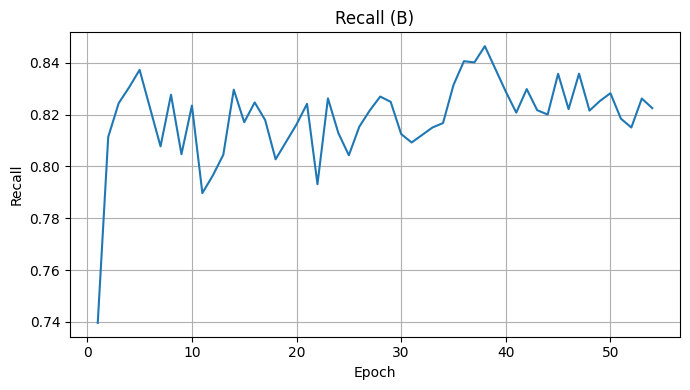

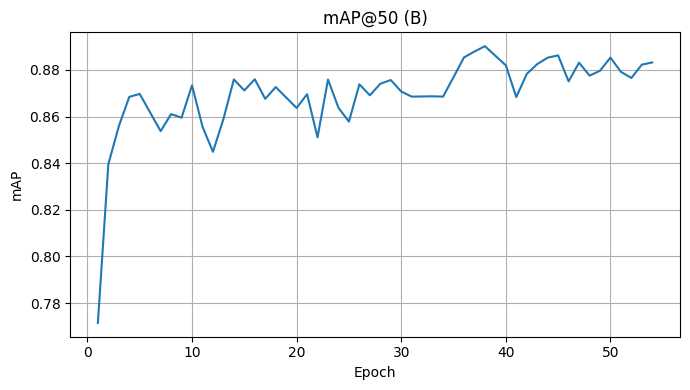

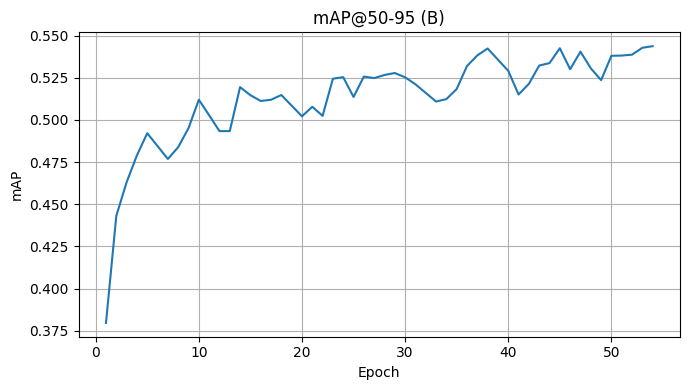

In [6]:
# -----------------------------
# 3️⃣ Metrics
# -----------------------------
plot_metric(results["epoch"], results["metrics/precision(B)"], "Precision (B)", "Precision")
plot_metric(results["epoch"], results["metrics/recall(B)"], "Recall (B)", "Recall")
plot_metric(results["epoch"], results["metrics/mAP50(B)"], "mAP@50 (B)", "mAP")
plot_metric(results["epoch"], results["metrics/mAP50-95(B)"], "mAP@50-95 (B)", "mAP")

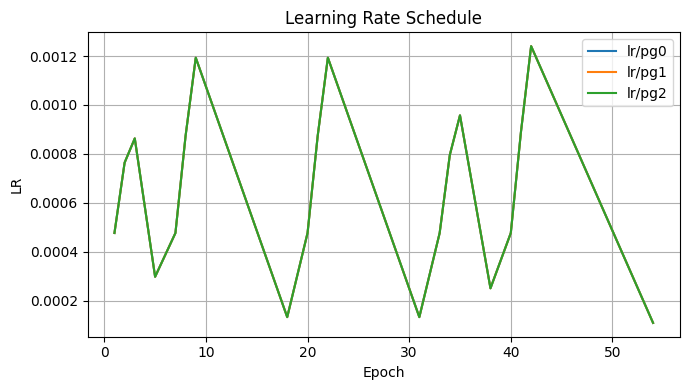

In [7]:
# -----------------------------
# 4️⃣ Learning Rate
# -----------------------------
plt.figure(figsize=(7,4))
plt.plot(results["epoch"], results["lr/pg0"], label="lr/pg0")
plt.plot(results["epoch"], results["lr/pg1"], label="lr/pg1")
plt.plot(results["epoch"], results["lr/pg2"], label="lr/pg2")
plt.title("Learning Rate Schedule")
plt.xlabel("Epoch")
plt.ylabel("LR")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


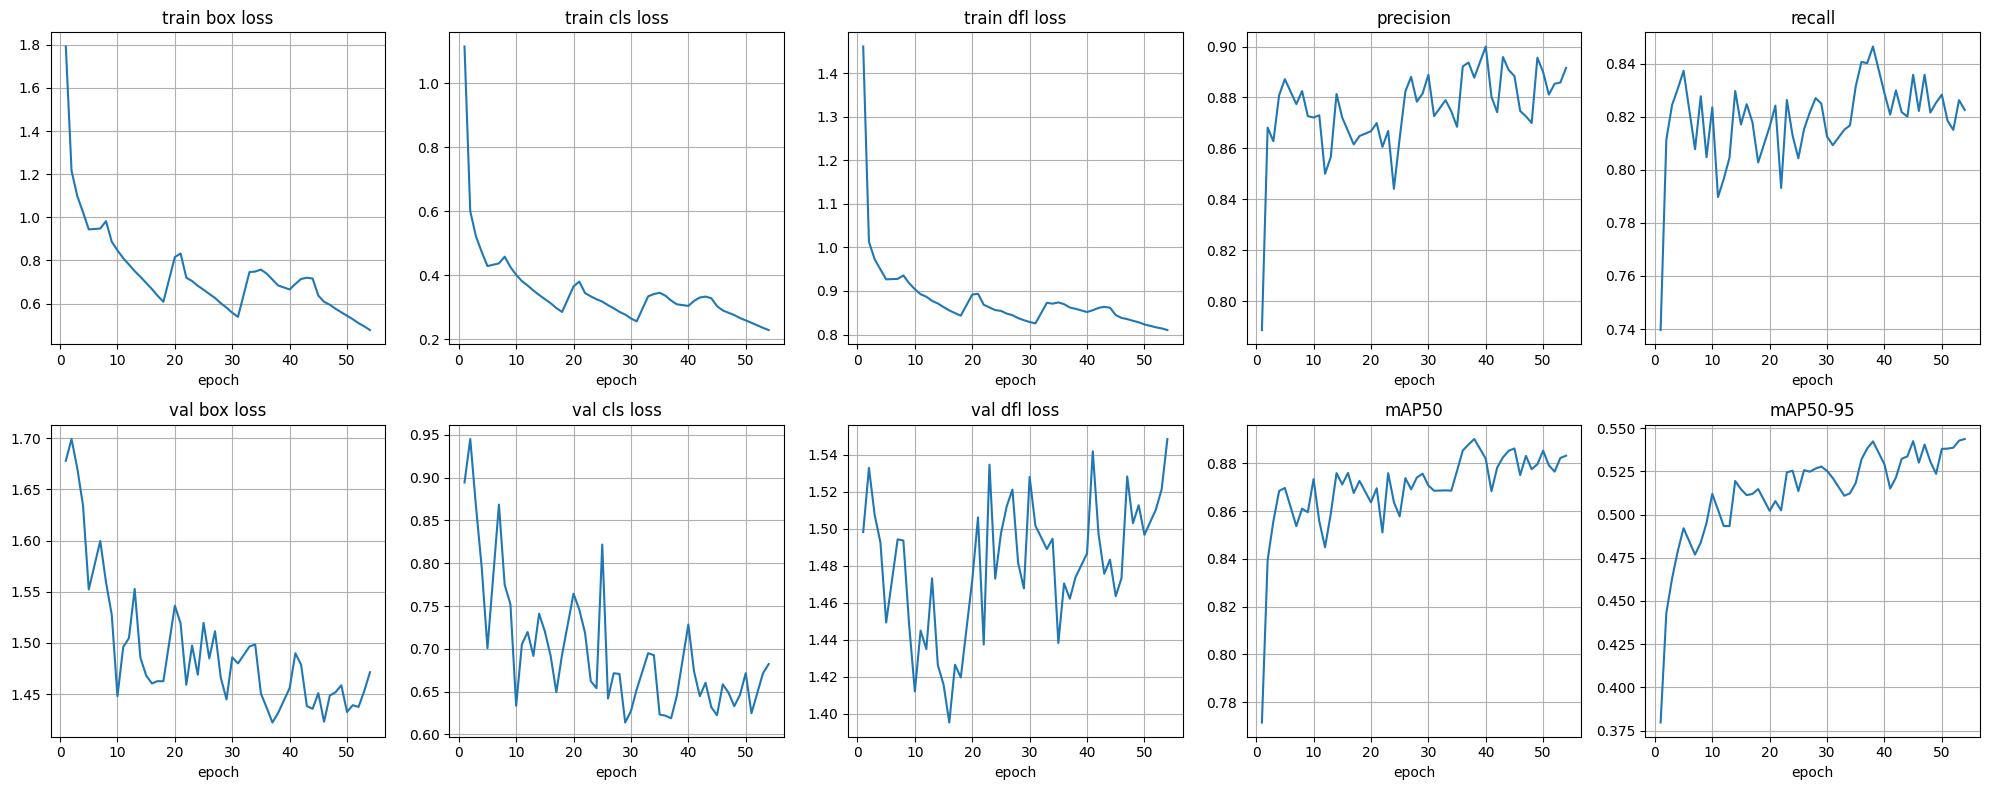

✅ YOLO-style results.png saved successfully


In [9]:
# -----------------------------
# Create YOLO-style plot
# -----------------------------
epochs = results["epoch"]
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.flatten()

plots = [
    ("train/box_loss", "train box loss"),
    ("train/cls_loss", "train cls loss"),
    ("train/dfl_loss", "train dfl loss"),
    ("metrics/precision(B)", "precision"),
    ("metrics/recall(B)", "recall"),

    ("val/box_loss", "val box loss"),
    ("val/cls_loss", "val cls loss"),
    ("val/dfl_loss", "val dfl loss"),
    ("metrics/mAP50(B)", "mAP50"),
    ("metrics/mAP50-95(B)", "mAP50-95"),
]

for i, (col, title) in enumerate(plots):
    axs[i].plot(epochs, results[col])
    axs[i].set_title(title)
    axs[i].set_xlabel("epoch")
    axs[i].grid(True)

plt.tight_layout()
plt.savefig("results.png", dpi=200)
plt.show()

print("✅ YOLO-style results.png saved successfully")

In [11]:
summary = {
    "Best Precision (B)": results["metrics/precision(B)"].max(),
    "Best Recall (B)": results["metrics/recall(B)"].max(),
    "Best mAP@50 (B)": results["metrics/mAP50(B)"].max(),
    "Best mAP@50–95 (B)": results["metrics/mAP50-95(B)"].max(),

    "Min Val Box Loss": results["val/box_loss"].min(),
    "Min Val Cls Loss": results["val/cls_loss"].min(),
    "Min Val DFL Loss": results["val/dfl_loss"].min(),
}

# Epoch of best mAP@50-95
best_map_row = results.loc[
    results["metrics/mAP50-95(B)"].idxmax()
]

best_epoch = int(best_map_row["epoch"])

print("\n📊 OVERALL TRAINING SUMMARY")
print("=" * 35)
for k, v in summary.items():
    print(f"{k:25s}: {v:.4f}")

print(f"\n🎯 Best mAP@50–95 achieved at epoch: {best_epoch}")


📊 OVERALL TRAINING SUMMARY
Best Precision (B)       : 0.9000
Best Recall (B)          : 0.8464
Best mAP@50 (B)          : 0.8902
Best mAP@50–95 (B)       : 0.5437
Min Val Box Loss         : 1.4221
Min Val Cls Loss         : 0.6138
Min Val DFL Loss         : 1.3953

🎯 Best mAP@50–95 achieved at epoch: 54
